In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('mr_data.csv')

In [4]:
data.drop('Unnamed: 0',axis = 1 ,inplace  = True)

In [5]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,1.0,709.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,1.0,6381.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,1.0,2127.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,2481.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [6]:
X = data.drop('Product_Supermarket_Sales',axis = 1)

In [7]:
y = data['Product_Supermarket_Sales']

In [8]:
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from xgboost import XGBRegressor

In [11]:
model = XGBRegressor()

In [12]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
pred1 = model.predict(X_test)

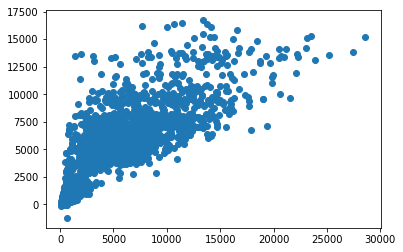

In [14]:
plt.scatter(y_test,pred1)

In [15]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(model,X_test,y_test,cv =10)

In [16]:
print(score.mean()*100)

53.32259256575649


In [17]:
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [18]:
params = {
        'gamma': [0.5,0.3, 1, 1.5, 2, 5],
        'learning_rate' :[0.1,0.2,0.001]
        }

In [19]:
grid = GridSearchCV( XGBRegressor() , params, verbose =  3  )

In [20]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] gamma=0.5, learning_rate=0.1 ....................................
[CV] ........... gamma=0.5, learning_rate=0.1, score=0.572791 -   0.2s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.522200 -   0.2s
[CV] gamma=0.5, learning_rate=0.1 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ........... gamma=0.5, learning_rate=0.1, score=0.548872 -   0.1s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.551708 -   0.1s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.498667 -   0.1s
[CV] gamma=0.5, learning_rate=0.2 ....................................
[CV] ........... gamma=0.5, learning_rate=0.2, score=0.510682 -   0.1s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-1.387981 -   0.1s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-1.543245 -   0.1s
[CV] gamma=0.5, learning_rate=0.001 ..................................
[CV] ........ gamma=0.5, learning_rate=0.001, score=-1.393506 -   0.1s
[CV] gamma=0.3, learning_rate=0.1 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   18.5s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.5, 0.3, 1, 1.5, 2, 5], 'learning_rate': [0.1, 0.2, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [21]:
grid_predictions = grid.predict(X_test)

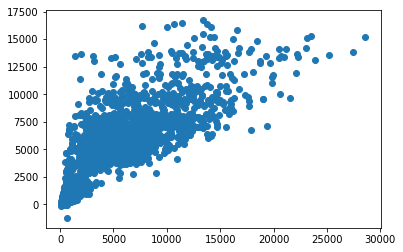

In [22]:
plt.scatter(y_test,grid_predictions)

In [ ]:
from sklearn.cross_validation import cross_val_score
scored = cross_val_score(grid,X_test,y_test,cv =10)

In [24]:
print(scored.mean()*100)

53.32259256575649


In [25]:
test = pd.read_csv('gbefun.csv')

In [26]:
test.drop('Unnamed: 0',axis = 1 , inplace = True)

In [27]:
mypred3 = grid.predict(test)

In [28]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
a = pd.DataFrame({'Product_Supermarket_Sales':mypred3})

In [29]:
submitted1 = pd.concat([dat11,a],axis =1)

In [30]:
submitted1.to_csv('kaggled2.csv',index = False)

In [31]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,1.0,709.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,1.0,6381.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,1.0,2127.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,2481.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [32]:
test.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,8.270,0.214125,459.98,2005,1.0,0.270,0.98,0,1,0,0,0,1,1,0,0,0
1,8.270,0.127821,464.98,1994,2.0,0.270,0.98,0,1,0,0,0,1,0,1,0,0
2,7.390,0.082171,477.38,1994,2.0,0.390,0.38,1,0,0,0,0,1,0,1,0,0
3,6.115,0.011791,472.63,2005,1.0,0.115,0.63,0,1,0,0,0,1,1,0,0,0
4,6.115,0.007038,473.13,1994,2.0,0.115,0.13,0,1,0,0,0,1,0,1,0,0


In [34]:
dat = pd.read_csv('kaggled1.csv')

In [35]:
dat.head(1)

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,DRA59_CHUKWUDI010,1467.0317


In [36]:
dat['a'] = (data['Product_Supermarket_Sales'] + dat['Product_Supermarket_Sales'])/2

In [37]:
dat.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales,a
0,DRA59_CHUKWUDI010,1467.0317,1088.05585
1,DRA59_CHUKWUDI013,9107.4100,7744.55000
2,DRB01_CHUKWUDI013,8542.2510,7461.97050
3,DRB13_CHUKWUDI010,1485.2194,1806.22470
4,DRB13_CHUKWUDI013,8646.8530,5564.31150


In [39]:
dat['b'] = data['Product_Supermarket_Sales'] - dat['a']

In [40]:
dat.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales,a,b
0,DRA59_CHUKWUDI010,1467.0317,1088.05585,-378.97585
1,DRA59_CHUKWUDI013,9107.4100,7744.55000,-1362.86000
2,DRB01_CHUKWUDI013,8542.2510,7461.97050,-1080.28050
3,DRB13_CHUKWUDI010,1485.2194,1806.22470,321.00530
4,DRB13_CHUKWUDI013,8646.8530,5564.31150,-3082.54150


In [42]:
dat.describe()

,Product_Supermarket_Sales,a,b
count,3532.000000,3532.000000,3532.000000
mean,4830.539510,5489.080711,658.541201
std,2827.863670,2644.808393,2649.510934
min,-644.717960,82.853663,-7275.077000
25%,2614.115150,3514.277250,-1158.273837
50%,4061.056550,5151.514825,464.117000
75%,7404.930825,7096.681800,2287.904475
max,15685.945000,16999.928500,13517.865150


In [43]:
data['Product_Supermarket_Sales'] = data['Product_Supermarket_Sales'] + 658

In [44]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,1.0,1367.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,2.0,7039.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,1.0,7039.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,1.0,2785.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,3139.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [45]:
X = data.drop('Product_Supermarket_Sales',axis = 1)

In [46]:
y = data['Product_Supermarket_Sales']

In [47]:
from sklearn.cross_validation import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
from xgboost import XGBRegressor

In [50]:
modelll = XGBRegressor()

In [51]:
modelll.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
pred = modelll.predict(X_test)

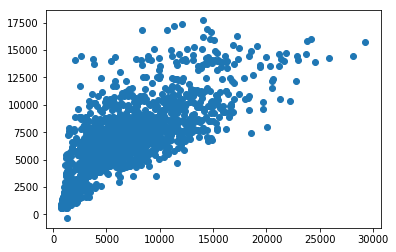

In [55]:
plt.scatter(y_test,pred)

In [56]:
myped = modelll.predict(test)

In [58]:
dat11  =pd.read_csv('submission_price.xls')
dat11.drop('Product_Supermarket_Sales',axis = 1 , inplace = True)
a = pd.DataFrame({'Product_Supermarket_Sales':myped})

In [60]:
submitted1 = pd.concat([dat11,a],axis =1)

In [61]:
submitted1.to_csv('tuesday.csv',index = False)

In [34]:
data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,0.068535,357.54,2005,1.0,709.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,0.040912,355.79,1994,2.0,6381.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,0.041178,350.79,2014,1.0,6381.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,0.041113,355.04,2016,1.0,2127.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0.0,2481.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [35]:
data.drop('Product_Shelf_Visibility', axis =  1 ,inplace =True )

In [36]:
data.head()

,Product_Weight,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Product_Supermarket_Sales,b,d,Low Fat,Normal Fat,Ultra Low fat,Cluster 1,Cluster 2,Cluster 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,11.6,357.54,2005,1.0,709.08,0.6,0.54,1,0,0,0,0,1,1,0,0,0
1,11.6,355.79,1994,2.0,6381.69,0.6,0.79,1,0,0,0,0,1,0,1,0,0
2,11.6,350.79,2014,1.0,6381.69,0.6,0.79,1,0,0,0,1,0,0,1,0,0
3,11.6,355.04,2016,1.0,2127.23,0.6,0.04,1,0,0,0,0,1,0,0,1,0
4,11.6,354.79,2011,0.0,2481.77,0.6,0.79,0,0,1,0,1,0,0,1,0,0


In [37]:
X = data.drop('Product_Supermarket_Sales', axis = 1)
y = data['Product_Supermarket_Sales']

In [38]:
from sklearn.cross_validation import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
from xgboost import XGBRegressor

In [41]:
model1 = XGBRegressor()

In [42]:
model1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [43]:
from sklearn import metrics

In [44]:
print(metrics.mean_squared_error(y_test,grid_predictions))

8978647.037872937


In [45]:
print(np.sqrt(metrics.mean_squared_error(y_test,grid_predictions)))

2996.4390595960626


In [46]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred1)))

2996.4390595960626


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [48]:
# Fit regression model
rng = np.random.RandomState(1)

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

In [49]:
regr_1.fit(X_train,y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x00000279E9E68948>)